### Load all necessary packages

In [1]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

from rpy2.robjects import numpy2ri, pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from rpy2.rinterface_lib import openrlib

robjects.r('''

library(MetENP)

''')
;

''

### Start data processing

In [2]:
data_1 = robjects.r['getmwstudies']('ST000915', 
    'data'
)

In [3]:
with openrlib.rlock:
    
    robjects.r.assign('data_1', data_1)
    
    robjects.r('''

    data_1_print = data.frame(apply(data_1, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
    head(data_1_print)

    ''')
    
    pass

In [4]:
metadata = robjects.r['getmwstudies']('ST000915', 
    'factors'
)

In [5]:
robjects.r.assign('metadata', metadata)

robjects.r('''
metadata_print = data.frame(apply(metadata, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(metadata_print)
''')

,,study_id,local_sample_id,subject_type,factors,Diagnosis
0,1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
1,2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.

### Associate metabolomics data to the refmet class

In [6]:
refmet_class = robjects.r['convert_refmet'](data_1)

robjects.r.assign('refmet_class', refmet_class)

robjects.r('''

refmet_class_print = data.frame(apply(refmet_class, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(refmet_class_print)

''')

,,metabolite_name,analysis_id,analysis_summary,metabolite_id,...,main_class,sub_class
0,1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,...,Diradylglycerols,DAG
1,2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,...,Diradylglycerols,DAG
2,3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,...,Diradylglycerols,DAG
3,4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,...,Diradylglycerols,DAG
4,5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,...,Diradylglycerols,DAG
5,6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,...,Diradylglycerols,DAG


In [7]:
robjects.r('''
data.frame(unique(metadata_print$factors))
''')

,,unique.metadata_print.factors.
0,1,Diagnosis:Cirrhosis
1,2,Diagnosis:NASH
2,3,Diagnosis:Normal
3,4,Diagnosis:Steatosis


In [8]:
robjects.r('''
data.frame(unique(data_1_print$analysis_summary))
''')

,,unique.data_1_print.analysis_summary.
0,1,Core G Fatty acids/Eicosanoids
1,2,Core J Sterols
2,3,Core K Prenols/Cardiolipins
3,4,Core E Neutral Lipids
4,5,Core I Sphingolipids
5,6,Core H Phospholipids


### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section

There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group.

In [9]:
robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', 'metabolite_name')
robjects.r.assign('fac1', 'Cirrhosis')
robjects.r.assign('fac2', 'Normal')
robjects.r.assign('faccol', 'Diagnosis')
robjects.r.assign('samcol', 'local_sample_id')
robjects.r.assign('normtype', ['50percent'])
robjects.r.assign('pthres', '0.05')
robjects.r.assign('thres_log2foldchangevar', '0.5')

0.5


In [10]:
robjects.r('''
ptreshnum<-as.numeric(pthres)
thres_log2foldchangenum<-as.numeric(thres_log2foldchangevar)
''')
;

''

In [11]:
robjects.r.assign('mettit', 'Core G Fatty acids/Eicosanoids, Core J Sterols, Core K Prenols/Cardiolipins, Core E Neutral Lipids, Core I Sphingolipids, Core H Phospholipids')
robjects.r('''
list_mettit <- strsplit(mettit, ',')
list_mettit = unlist(list_mettit, TRUE, TRUE)
titles <- list()
for(elm in list_mettit) {
    elm = trimws(elm)
    titles <- c(titles, elm)
}
''')

<rpy2.rinterface_lib.sexp.NULLType object at 0x7ff48b007580> [RTYPES.NILSXP]

In [12]:
#is p adjust ONLY FDR?

robjects.r('''
stats_metabolites = significant_met(metabolomics_data=refmet_class_print, met_col=metcol,analysis_type=c(titles), metadata=metadata, factor1=fac1, factor2=fac2, factor_col=faccol,sample_col=samcol, p_adjust='fdr',normalization=normtype)
''')
;

''

In [13]:
robjects.r('''
sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= ptreshnum&abs(stats_metabolites[,"log2Fold_change"])>thres_log2foldchangenum),]
''')
;

''

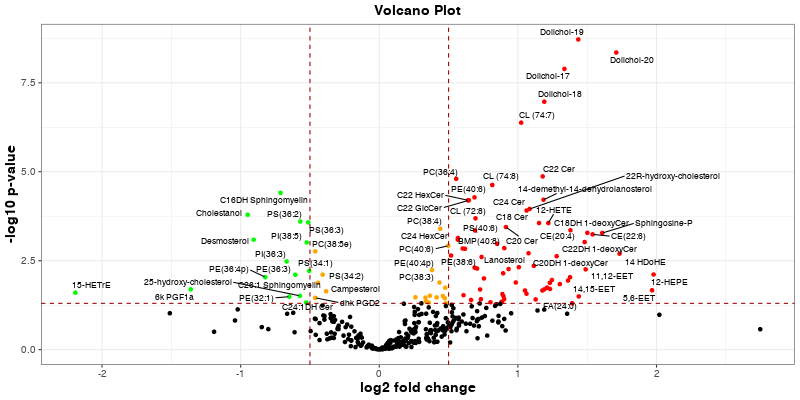

In [14]:
image_png(robjects.r('''
plot_volcano(stats_metabolites, thres_pval= ptreshnum, thres_log2foldchange = thres_log2foldchangenum, TRUE)
'''))

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [15]:
with openrlib.rlock:
    robjects.r('''
    sig_metabolites_kegg_id= map_keggid(sig_metabolites)
    ''')
    pass

#### Check all your significant metabolites have not been assigned metabolite class
Outcome should be 0 elements (?)

In [16]:
robjects.r('''
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)
''')

<rpy2.robjects.vectors.StrVector object at 0x7ff4902b1940> [RTYPES.STRSXP]
R classes: ('character',)
[]

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [17]:
robjects.r.assign('classtype', ['sub_class'])
robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = 0.5)
''')
;

''

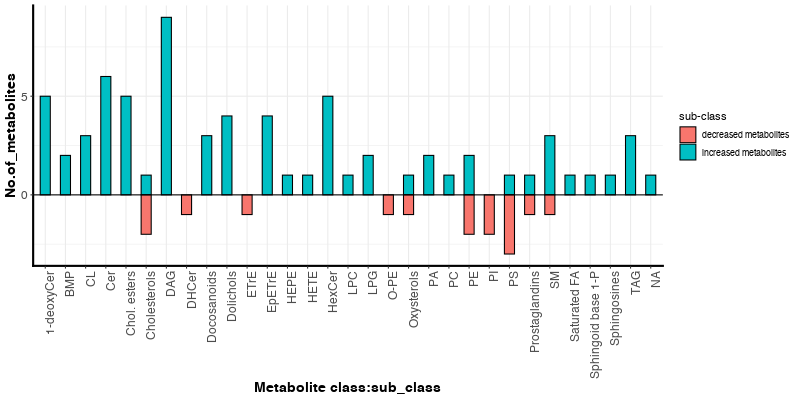

In [18]:
image_png(robjects.r('''
count_changes$plotimg
'''))

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [19]:
robjects.r.assign('sigmets', 3)

3


In [20]:
robjects.r('''
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass=metclassvar,enrich_stats="HG",no=sigmets)
''')
;

''

#### Plot the enrichment score via function plot_met_enrichment

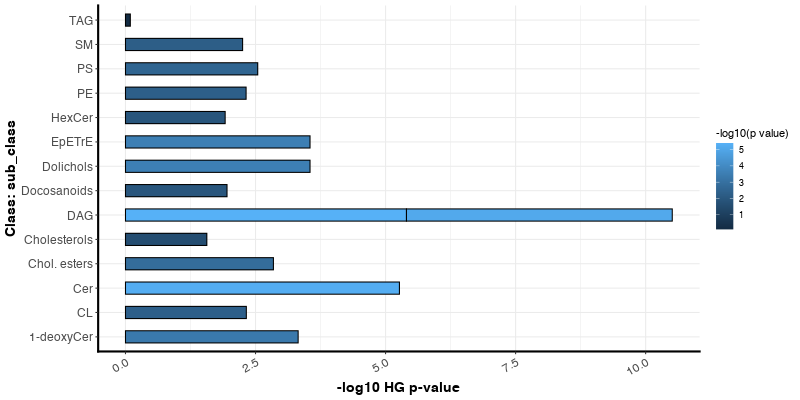

In [21]:
image_png(robjects.r('''
plot_met_enrichment(metenrichment, metclassvar,"HG", no=sigmets)
'''))

### Check the pathways with reactions of all the significant metabolites

In [22]:
robjects.r.assign('studyOrg', 'hsa')
robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')

,,rxn,refmet_name,Exact mass,KEGG ID,...,pathway_id,sps_path_id
0,1,R01003,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
1,2,R01003,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
2,3,R01018,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
3,4,R01018,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
4,5,R01312,"1,2-DG 34:0",596.5380,C00641,...,rn00564,hsa00564
5,6,R01312,"1,2-DG 36:4",616.5067,C00641,...,rn00564,hsa00564


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [23]:
#setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

#not necessary for final script?

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [24]:
robjects.r('''
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='fdr', kegg_comp_path=FALSE)
head(kegg_es)
''')

,,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
0,1,Arachidonic acid metabolism,4,75,0.999173034565787,0.999173034565787
1,2,Glycerolipid metabolism,12,38,0.008469408188587033,0.02117352047146758
2,3,Glycerophospholipid metabolism,17,52,0.0009973045347542882,0.003324348449180961
3,4,"Glycine, serine and threonine metabolism",4,50,0.9705818848647176,0.999173034565787
4,5,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,13,16,5.698535988454919e-09,2.8492679942274595e-08
5,6,Inositol phosphate metabolism,9,47,0.3070207366874475,0.4386010524106393


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

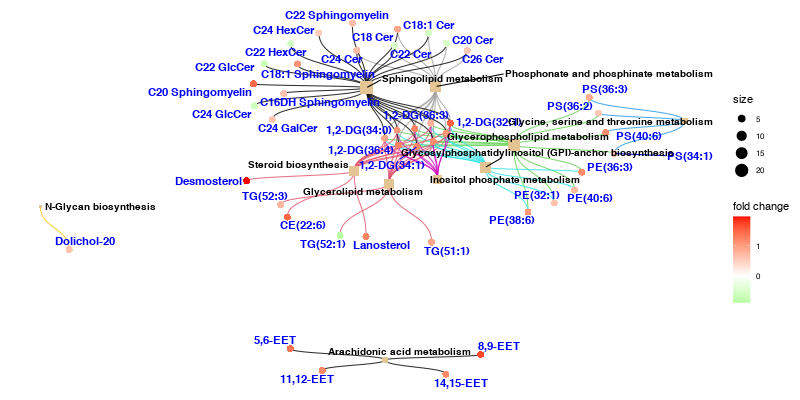

In [25]:
image_png(robjects.r('''
plot_pathway_networks (met_path,kegg_es, TRUE)
'''))

### Heatmap

In [26]:
robjects.r.assign('x_size_heat', 8)
robjects.r.assign('y_size_heat', 6)

6


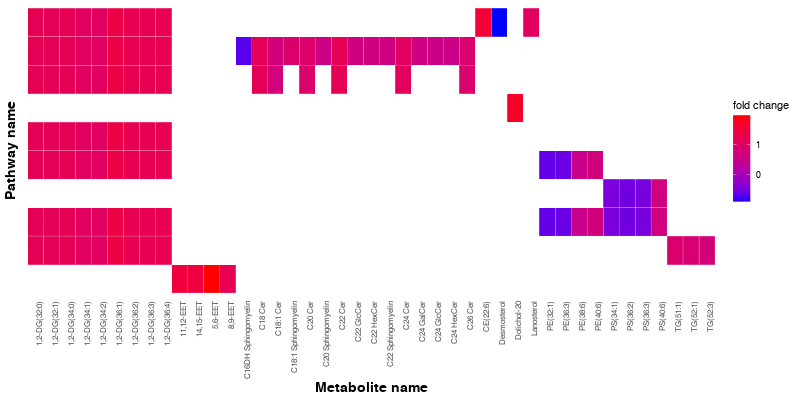

In [27]:
image_png(robjects.r('''
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=x_size_heat, yaxis=y_size_heat)
'''))

### Dotplot

In [28]:
robjects.r.assign('x_size_dot', 8)
robjects.r.assign('y_size_dot', 6)

6


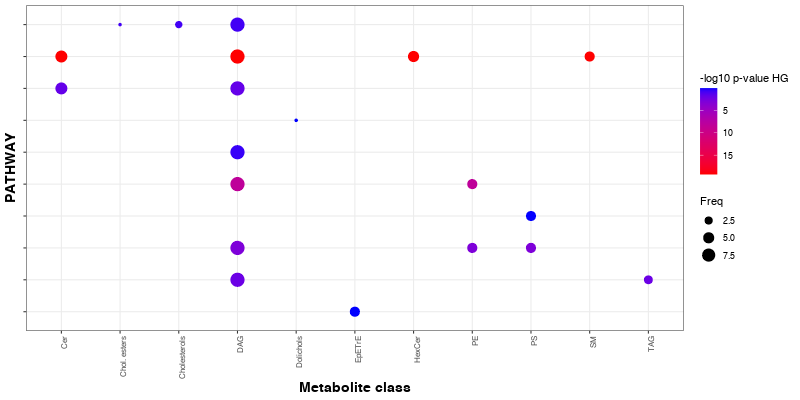

In [29]:
image_png(robjects.r('''
dotplot_met_class_path (met_path, kegg_es, metclassvar,xaxis=x_size_dot,yaxis=y_size_dot)
'''))

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [30]:
robjects.r('''
met_gene_info = enzyme_gene_info (metenrichment, studyOrg, metclassvar)
head(met_gene_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,EQUATION_more,ENZYME
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""


#### Get the information if metabolite is a reactant or substrate

In [31]:
robjects.r('''
rclass_info = react_substrate(met_gene_info)
head(rclass_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,ENZYME,reactant_product
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""2.3.1.26""",Product
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""2.3.1.26""",Product


#### Get gene info in short form

In [32]:
robjects.r('''
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']
''')

,,Metabolite,orthology_id,ORTHOLOGY,gene_id,...,ENZYME,reactant_product
0,1,PE(38:6),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
1,2,PE(32:1),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
2,3,PE(40:6),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholi